# Managing Tables & Spreadsheet Data Revisited

- Read spreadsheet => **Dataframe**
- Display contents
- Filter contents
- Display charts

## Displaying Spreadsheet Data

In [7]:
# This version uses headers="keys" 
import pandas as pd
from tabulate import tabulate

# Step 1: Load the spreadsheet
filename = "brussels_weather_2020.xlsx"   # Adjust path if needed
df = pd.read_excel(filename)

# Step 2: Display the filtered results using headers="keys"
# The argument headers="keys" tells tabulate to use the column names (i.e., keys) from the DataFrame as the headers for the table
print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))

+-----------+------------+------------+--------------+---------------+--------------+
| Month     |   Max Temp |   Min Temp |   Sunny Days |   Cloudy Days |   Rainy Days |
+===========+============+============+==============+===============+==============+
| January   |         10 |         -1 |            5 |            15 |           11 |
+-----------+------------+------------+--------------+---------------+--------------+
| February  |         12 |          0 |            6 |            12 |           11 |
+-----------+------------+------------+--------------+---------------+--------------+
| March     |         15 |          2 |            8 |            14 |            9 |
+-----------+------------+------------+--------------+---------------+--------------+
| April     |         18 |          5 |           12 |            10 |            8 |
+-----------+------------+------------+--------------+---------------+--------------+
| May       |         22 |          9 |           14 |

## Filtering spreadsheet

In [9]:
# Run previous code cell first
# Step 3: Filter the DataFrame directly
filtered_df = df[df["Sunny Days"] > 15]  # This creates a boolean mask (a list of True/False values) to select matching rows

# Step 4: Display the filtered results using headers="keys"
print(tabulate(filtered_df, headers="keys", tablefmt="grid", showindex=False))

+---------+------------+------------+--------------+---------------+--------------+
| Month   |   Max Temp |   Min Temp |   Sunny Days |   Cloudy Days |   Rainy Days |
+=========+============+============+==============+===============+==============+
| July    |         28 |         15 |           18 |             7 |            6 |
+---------+------------+------------+--------------+---------------+--------------+
| August  |         27 |         14 |           17 |             8 |            6 |
+---------+------------+------------+--------------+---------------+--------------+


## Displaying chart based on a spreadsheet

**Line Graph (repeated)**

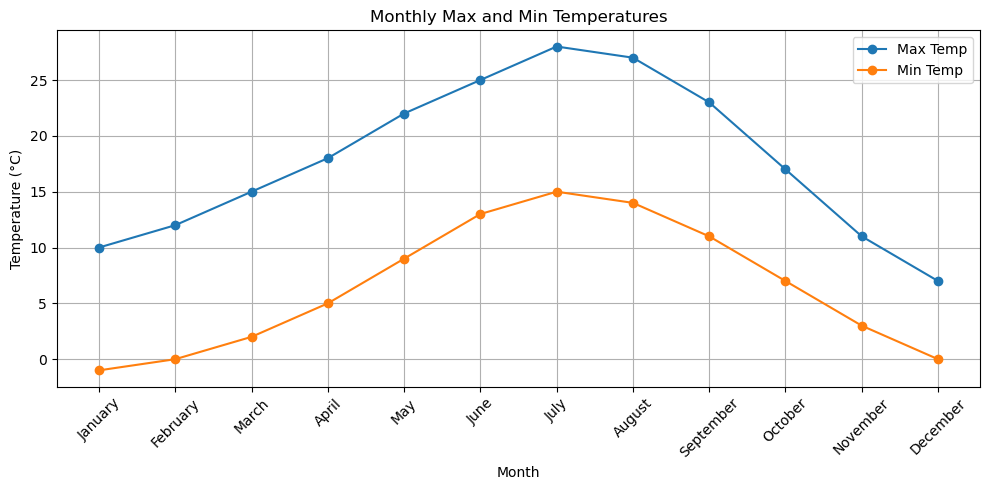

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

# LINE GRAPH: Max and Min Temperatures per Month
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Max Temp'], marker='o', label='Max Temp')
plt.plot(df['Month'], df['Min Temp'], marker='o', label='Min Temp')
plt.title('Monthly Max and Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar chart**

12


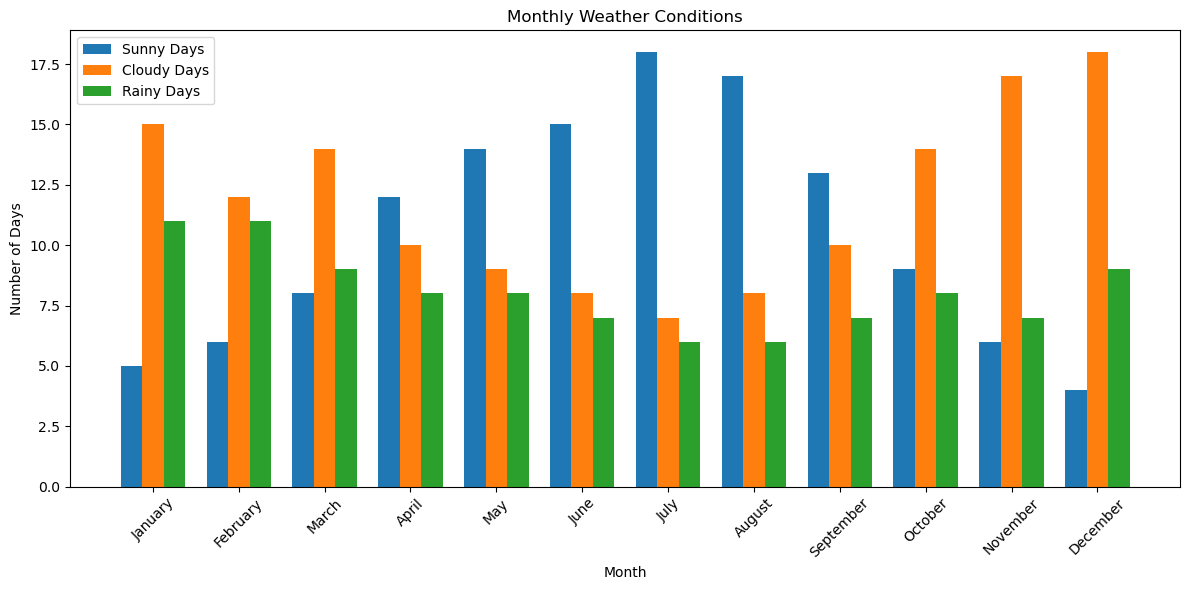

In [65]:
# BAR GRAPH: Sunny, Cloudy, and Rainy Days per Month
plt.figure(figsize=(12, 6))
bar_width = 0.25
# print(len(df['Month']))
x = range(len(df['Month']))
# print(x)
# Filtering dataframes on: Sunny, Cloudy and Rainy Days
plt.bar([i - bar_width for i in x], df['Sunny Days'], width=bar_width, label='Sunny Days')
plt.bar(x, df['Cloudy Days'], width=bar_width, label='Cloudy Days')
plt.bar([i + bar_width for i in x], df['Rainy Days'], width=bar_width, label='Rainy Days')

plt.title('Monthly Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(ticks=x, labels=df['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Changing colors in the same chart**

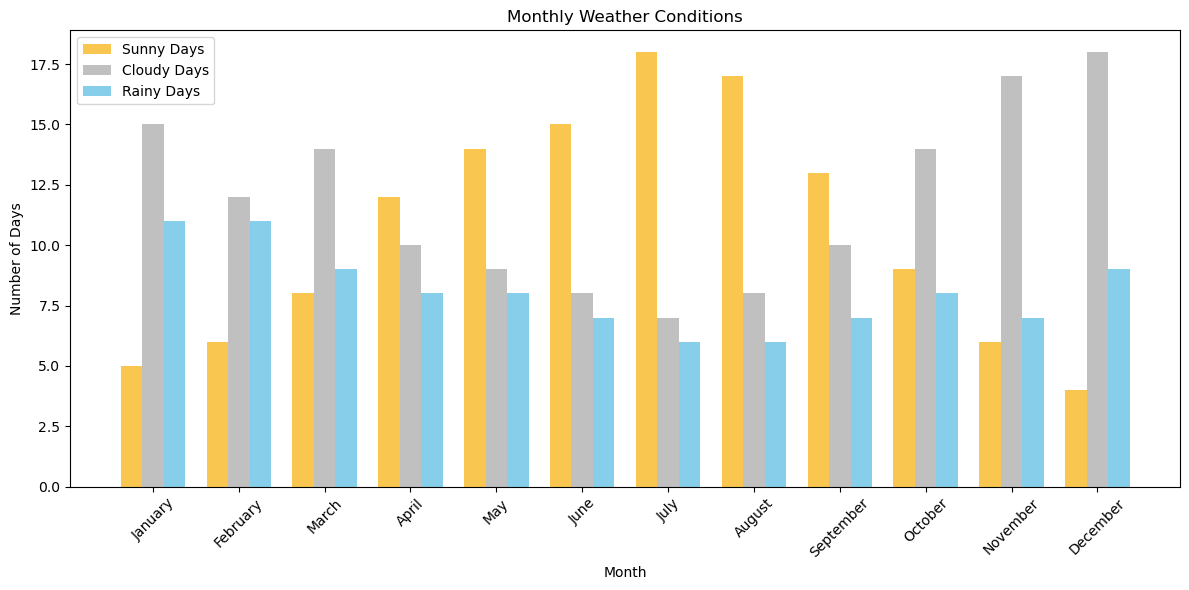

In [57]:
import matplotlib.pyplot as plt

# BAR GRAPH: Sunny, Cloudy, and Rainy Days per Month
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(df['Month']))

# Define colors
sunny_color = '#f9c74f'   # yellow/gold
cloudy_color = 'silver'   # silver
rainy_color = '#87ceeb'   # bluesky 

# Plot bars with custom colors
plt.bar([i - bar_width for i in x], df['Sunny Days'], width=bar_width, label='Sunny Days', color=sunny_color)
plt.bar(x, df['Cloudy Days'], width=bar_width, label='Cloudy Days', color=cloudy_color)
plt.bar([i + bar_width for i in x], df['Rainy Days'], width=bar_width, label='Rainy Days', color=rainy_color)

plt.title('Monthly Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(ticks=x, labels=df['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Scatter Chart**

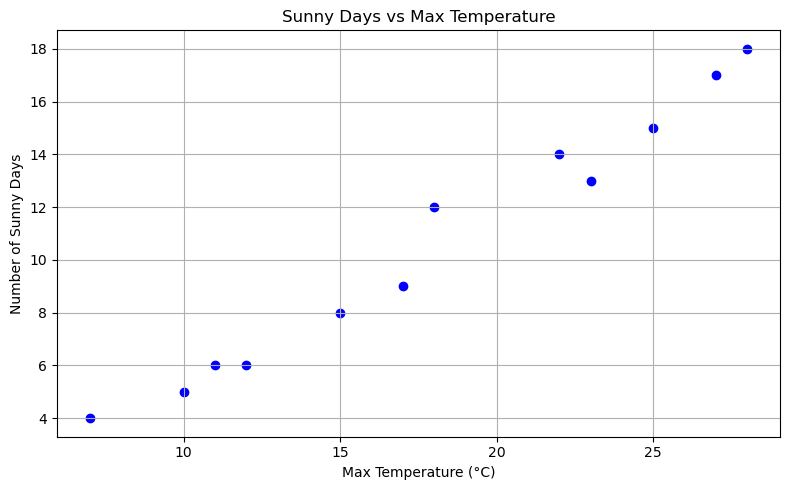

In [28]:
# SCATTER CHART: Max Temp vs Sunny Days
plt.figure(figsize=(8, 5))
plt.scatter(df['Max Temp'], df['Sunny Days'], color='blue')  # Filtering dataframe on Max Temp and Sunny Days
plt.title('Sunny Days vs Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Sunny Days')
plt.grid(True)
plt.tight_layout()
plt.show()

**Adding Linear Trendline**

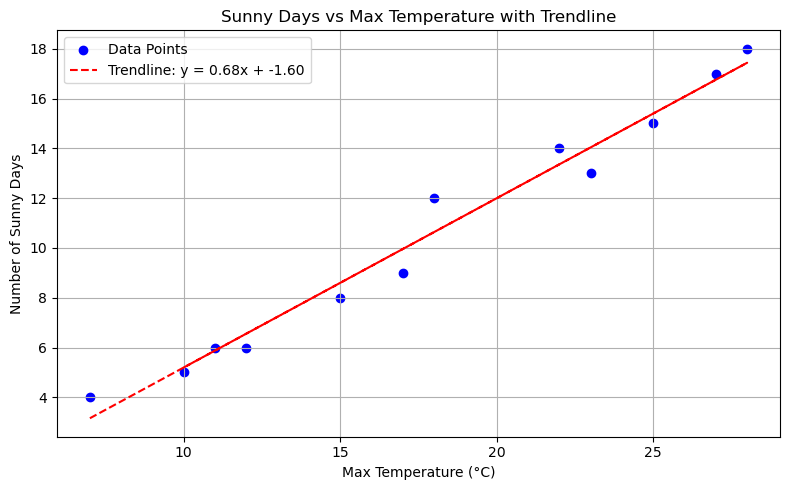

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust if needed
df = pd.read_excel(file_path)

# Scatter chart with trendline
plt.figure(figsize=(8, 5))
x = df['Max Temp']       # Filtering dataframe on Max Temp
y = df['Sunny Days']     # Filtering on Sunny Days

# Plot scatter points in blue
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate and plot linear trendline (red dashed line)
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label=f'Trendline: y = {z[0]:.2f}x + {z[1]:.2f}')

# Chart formatting
plt.title('Sunny Days vs Max Temperature with Trendline')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Sunny Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**In the scatter chart we are working with the relationship between Max Temperature and Sunny Days.**

In most causal or predictive interpretations, the independent variable (x-axis) is the one you suspect influences the other.

- Max Temperature → independent variable → should be on the x-axis
- Sunny Days → dependent variable → should be on the y-axis

This makes sense: higher temperatures might lead to more sunny days — not the other way around.

**Trendline**

- The trendline in a scatter chart, like the one created for "Sunny Days vs Max Temperature", is a line that best approximates the relationship between two variables.
- For each 1°C increase in max temperature, we expect 0.8 more sunny days on average.

# Python Functions and Libraries Continued

## Functions are created for (small) tasks that are useful and common

**Example: Function parameters and arguments**

You define a function with parameters. You call a function with arguments.

- **Parameters** live inside a function’s definition — they define what kind of input the function can take.
- **Arguments** live outside the function — they are the actual data you provide when calling the function, and they get assigned to the parameters.

In [251]:
def greet(name):          # ← 'name' is a parameter
    print("Hello", name)

greet("Alice")            # ← "Alice" is an argument

Hello Alice


**What is wrong in the fragment below?**

In [259]:

def add_numbers(a, b=2, c):
    print(a + b + c)
 
add_numbers(a=1, c=3)

SyntaxError: non-default argument follows default argument (1946727445.py, line 1)

You’re placing a **default** argument (b=2) before a **required** argument (c), which is not allowed in Python.

Python needs to know which values are required, and once it sees a default value, it assumes all parameters after that must also have default values.

**Option 1: Make c also a default parameter**

In [264]:
def add_numbers(a, b=2, c=0):
    print(a + b + c)

add_numbers(a=1, c=3)  # Output: 6

6


**Option 2: Rearrange the parameters**

In [274]:

def add_numbers(a, c, b=2):
    print(a + b + c)

add_numbers(a=1, c=3)  # Output: 6

6


**Example: Printing a string multiple times**

**What is the difference between the cell below and the function in the next cell ?**

In [84]:
def hi(how_many = 1, separator = " "):
    for printout in range(how_many):
        print("hi", sep=separator)

hi(5, "-")
#hi()                      # Output: hi
#hi(3)                     # Output: hi hi hi
#hi(5, "-")                # Output: hi-hi-hi-hi-hi
#hi(2, "\n")               # Output:

hi
hi
hi
hi
hi


In [86]:
# What is the difference between this and the function in the previous cell ?
def hi(how_many=1, separator=" "):
    print(separator.join(["hi"] * how_many))

hi(5, "-")
#hi()                      # Output: hi
#hi(3)                     # Output: hi hi hi
#hi(5, "-")                # Output: hi-hi-hi-hi-hi
#hi(2, "\n")               # Output:

hi-hi-hi-hi-hi


**Notes:**

**["hi"] * how_many**
- This creates a list that repeats the string "hi" a number of times equal to how_many.

**separator.join([...])**
- The **.join()** method takes a **list of strings** and joins them together into one string, placing the given separator between each element.

**Examples of join()**

In [243]:
# Example 1
" ".join(['hi', 'hi', 'hi'])  # outputs: 'hi hi hi'


'hi hi hi'

In [245]:
# Example 2
"-".join(['hi', 'hi'])        # outputs:  'hi-hi'


'hi-hi'

In [247]:
# Example 3
# "\n".join(['hi', 'hi'])             # outputs:  'hi\nhi'
print("\n".join(['hi', 'hi']))      # printed as two lines
      

hi
hi


## Return Values

**Example: Function using return value**

- The **return** statement exits the function, possible with a calculated value

In [97]:
def list_sum(lst):
    """ This function only works on a list """
    s = 0
 
    for elem in lst:        s += elem
 
    return s

In [99]:
# Passing a list to the function
# Run the previous cell first
print(list_sum([5, 4, 3]))

12


In [101]:
# Passing something else than a list, will result in a TypeError
print(list_sum(5))

TypeError: 'int' object is not iterable

## Return Date Results

**Example: How many days are between two dates ?**

- Function using **return**
- if a function doesn't return a certain value using a return expression clause, it is assumed that it implicitly returns **None**

In [104]:
from datetime import datetime

def days_between_dates(date1_str, date2_str, date_format="%Y-%m-%d"):
    """
    Returns the number of days between two dates.
    
    Args:
        date1_str: First date as a string (e.g., "2025-05-01")
        date2_str: Second date as a string (e.g., "2025-05-27")
        date_format: Optional date format string (default: "YYYY-MM-DD")
        The order of the arguments does not matter because you are using abs() to return the absolute difference
    """
    d1 = datetime.strptime(date1_str, date_format)
    d2 = datetime.strptime(date2_str, date_format)
    return abs((d2 - d1).days)


 - **Triple quotes** (""" ... """) are used to write a docstring in Python — a special kind of string that documents a function, class, or module.

In [106]:
# Run previous cell first
# Example usage
print(days_between_dates("2025-05-01", "2025-05-27"))  # Output: 26

26


In [110]:
from datetime import datetime
date_now = datetime.now()
date_today_str = date_now.strftime("%Y-%m-%d")
print("Today:", date_today_str )
birthday = input("Please enter a birthday (YYYY-MM-DD)")
print(days_between_dates(date_today_str, birthday))

Today: 2025-05-28


Please enter a birthday (YYYY-MM-DD) 1999-1-1


9644


**Example: How many months are between two dates ?**

In [112]:
from datetime import datetime

def months_between(date1_str, date2_str, date_format="%Y-%m-%d"):
    """
    Returns the number of full months between two dates.
    
    Args:
        date1_str: First date as a string (e.g., "2025-01-15")
        date2_str: Second date as a string (e.g., "2025-05-27")
        date_format: Format of the input dates (default: "%Y-%m-%d")
        
    Returns:
        Number of full months (integer)
    """
    d1 = datetime.strptime(date1_str, date_format)
    d2 = datetime.strptime(date2_str, date_format)

    # Ensure d1 is before d2
    if d1 > d2:
        d1, d2 = d2, d1

    # Calculate year and month difference
    year_diff = d2.year - d1.year
    month_diff = d2.month - d1.month

    total_months = year_diff * 12 + month_diff

    # Adjust if the end day is before the start day
    if d2.day < d1.day:
        total_months -= 1

    return total_months


In [114]:
# Run previous cell first
print(months_between("2025-01-15", "2025-05-27"))  # Output: 4
print(months_between("2025-05-27", "2025-01-15"))  # Output: 4 (order doesn't matter)
print(months_between("2025-01-31", "2025-02-28"))  # Output: 0 (not a full month)

4
4
0


## Datetime: Under the hood

- **datetime objects** are not stored as a single number (like a timestamp), but rather as structured fields (like a class with attributes).
- If needed, you can convert a datetime to a **Unix timestamp** (seconds since **1970-01-01 UTC**)
- Dates before 1970 are simply negative timestamps
- The UNIX timestamp is still very commonly used in modern computing — especially in contexts where time needs to be stored, transferred, or compared in a **compact and universal** format.

In [294]:
from datetime import datetime
date_now = datetime.now()           # Get the current date and time
timestamp = date_now.timestamp()    # Convert to Unix timestamp
print(timestamp)                    # e.g., 1748327400.0


1748343199.115803


In [292]:
# shorter
from datetime import datetime
timestamp = datetime.now().timestamp()
print(timestamp)

1748343195.460385


## Functions Continued

**Example: What kind of file is it?**

- text
- csv
- pdf
- data
- spreadsheet
- image
- video
- ...

Applications can only function with specific file types. It begins by looking at the **file extension**.

In [28]:
def get_file_extension(filename):
    """Returns the extension of a filename (e.g. 'txt' or 'jpg')."""
    parts = filename.rsplit('.', 1)
    # print(parts)
    return parts[1] if len(parts) == 2 else ''


In [26]:
# Run previous cell first
print(get_file_extension("document.pdf"))     # Output: pdf
print(get_file_extension("archive.tar.gz"))   # Output: gz
print(get_file_extension("no_extension"))     # Output: (empty string)

['document', 'pdf']
pdf
['archive.tar', 'gz']
gz
['no_extension']



**Why is this function useful?**

- It's used in file uploads, data validation, and file conversions.
- It's better than using split('.') blindly (handles edge cases).
- It’s reusable and improves code clarity.

## Recursive functions

**Business Example: Calculating total salary cost in an organizational chart**

- Recursion is a programming technique where a function calls itself to solve a problem by breaking it down into smaller, similar subproblems. It continues until a base case is reached, which stops the repeated calls and allows the solution to build back up.
- Recursion isn't just for math problems! It can be very useful in business applications, especially for dealing with hierarchical or nested structures.

In [5]:
# Example company hierarchy
# "team": a list of names of people they manage directly
employees = {
    "Alice": {"salary": 50000, "team": ["Bob", "Carol"]},
    "Bob": {"salary": 40000, "team": ["Dave"]},
    "Carol": {"salary": 30000, "team": ["Dinky"]},
    "Dave": {"salary": 25000, "team": []},
    "Dinky": {"salary": 20000, "team": []}
}


In [139]:
# Run previous cell first
def total_salary(name):
    """
    Recursively calculate the total salary for an employee and their full team.
    Includes all indirect reports down the hierarchy.
    """
    employee = employees[name]
    total = employee["salary"]
    for teammate in employee["team"]:
        total += total_salary(teammate)  # Recursive call
    return total

# === Fixed example: salary of the entire company starting from Alice ===
print(f"Total salary cost for Alice's team: {total_salary('Alice')} Euro")

# === Custom examples: compute for any given team leader ===
team_lead = 'Bob'
print(f"Total salary cost for {team_lead}'s team: {total_salary(team_lead)} Euro")

team_lead = 'Carol'
print(f"Total salary cost for {team_lead}'s team: {total_salary(team_lead)} Euro")

team_lead = 'Dinky'
print(f"Total salary cost for {team_lead}'s team: {total_salary(team_lead)} Euro")


Total salary cost for Alice's team: 165000 Euro
Total salary cost for Bob's team: 65000 Euro
Total salary cost for Carol's team: 50000 Euro
Total salary cost for Dinky's team: 20000 Euro


## Python libraries continued

**Example: Adding text to image files**

- It’s possible to create a Python function that adds a text string to an image file — using the **Pillow** library (the modern fork of PIL, the Python Imaging Library).

In [91]:
# Run this once
! pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from PIL import Image, ImageDraw, ImageFont

def add_text_to_image(input_path, output_path, text, position=(10, 10), font_size=24):
    """
    Adds text to an image and saves it as a new file.
    
    Args:
        input_path: Path to the input image.
        output_path: Path to save the modified image.
        text: Text string to add.
        position: Tuple (x, y) for text position.
        font_size: Size of the text font.

    RGBA stands for:
        R – Red
        G – Green
        B – Blue
        A – Alpha (transparency)

    When the alpha value is set to 0, the color becomes invisible, and the underlying content or background will be fully visible.
    """
    # Open the image
    image = Image.open(input_path).convert("RGBA")
    
    # Create a transparent layer to draw text on
    txt_layer = Image.new("RGBA", image.size, (255,255,255,0))
    draw = ImageDraw.Draw(txt_layer)

    # Load default font or specify one
    try:
        font = ImageFont.truetype("arial.ttf", font_size)  # or another .ttf path
    except:
        font = ImageFont.load_default()

    # Draw the text
    draw.text(position, text, fill=(255, 0, 0, 255), font=font)  # red text

    # Combine image with text layer
    combined = Image.alpha_composite(image, txt_layer)

    # Save to output file
    combined.convert("RGB").save(output_path, "JPEG")


In [109]:
# Run previous cell first
add_text_to_image("white_table.jpg", "written_table.jpg", "Hello", position=(700, 400), font_size=64)


In [111]:
# Run previous cell first
# Adding a second text
add_text_to_image("written_table.jpg", "written_table_2.jpg", "What's up?", position=(700, 1000), font_size=64)

**Example: Simple Python script to display a .jpg image in a Jupyter Notebook using Pillow and IPython.display**

**Notes:**

- This works only in Jupyter Notebooks (like JupyterLab, VS Code Notebooks, or Google Colab).
- The display() function is from IPython.display, and it's specifically designed to render rich outputs (like images, HTML, etc.).

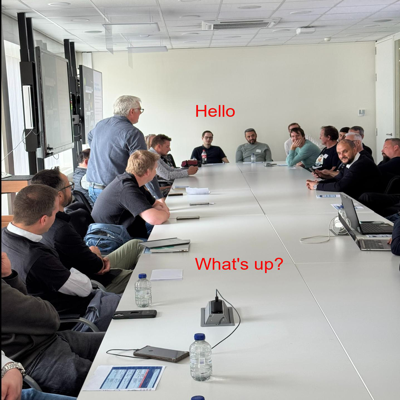

In [130]:
from PIL import Image
from IPython.display import display

# Load the image (replace 'your_image.jpg' with your filename)
image = Image.open("written_table_2.jpg")

# Display the image in the notebook
# display(image)

resized_image = image.resize((400, 400))  # width, height
display(resized_image)


## Maps
**Example: Show a Location on OpenStreetMap with folium**

In [141]:
# First, install the library (if needed)
! pip install folium
# To search by a place name
! pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


** Showing a location based on latitude and longitude**

**Example using fixed latitude and longitude**

In [149]:
import folium

# Define the coordinates (e.g., Brussels)
latitude = 50.8503
longitude = 4.3517

# Create a map centered around the location
mymap = folium.Map(location=[latitude, longitude], zoom_start=13)

# Add a marker to the map
folium.Marker([latitude, longitude], popup="Brussels, Belgium").add_to(mymap)

# Display the map (works in Jupyter Notebooks)
mymap

**Example Using Location Name, instead of Coordinates**

**using IPython**
- IPython stands for **Interactive Python**
- IPython is the **kernel** that runs Python code inside Jupyter Notebooks
- It is an enhanced interactive shell built for Python programming — offering a richer, more productive experience than the standard Python interpreter
- Displays **images, LaTeX, HTML, tables, and charts** when used in Jupyter
- You can run **shell commands** like **!ping ; !pip install folium** inside IPython

In [156]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import display  # 👈 needed for notebooks

def show_location_on_map(place_name):
    # Geocoding with OpenStreetMap
    geolocator = Nominatim(user_agent="my_map_app")
    location = geolocator.geocode(place_name)

    if location:
        print(f"Found: {location.address}")
        print(f"Coordinates: {location.latitude}, {location.longitude}")

        # Create and display the map
        mymap = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
        folium.Marker([location.latitude, location.longitude], popup=location.address).add_to(mymap)

        display(mymap)  # 👈 this ensures it renders in the notebook
    else:
        print("Location not found.")


In [158]:
# Run previous cell first
# Replace this with any location name
map_output = show_location_on_map("Eiffel Tower, Paris")
if map_output:
    map_output

Found: Tour Eiffel, 5, Avenue Anatole France, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, France métropolitaine, 75007, France
Coordinates: 48.8582599, 2.2945006


**Example: Requesting input of location name**

In [162]:
# Run previous cell first
# Request realtime location input
location_requested = input("What location would you like to see? (e.g. Eiffel Tower, Paris)")
map_output = show_location_on_map(location_requested)
if map_output:
    map_output

What location would you like to see? (e.g. Eiffel Tower, Paris) Paramaribo, Suriname


Found: Centrum, Paramaribo, Suriname
Coordinates: 5.8241764, -55.1662813
